# Cluster Size Recommendation

This document was inspired by NeuralNine's excellent [tutorial](https://www.youtube.com/watch?v=ARjx__t5OCI&list=WL&index=43)

In [463]:
#Importing necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

In [481]:
#Defining constants to be used throughout
CENTERS = 7
RANDOM_STATE = 55
MIN_NUM_CLUSTERS = 2
MAX_NUM_CLUSTERS = CENTERS*2+1

In [482]:
def elbow(x,y):
    slopes=[]
    var=[]
    for i in range(1,len(x)):
        slopes.append([x[i],(y[i]-y[i-1])/(x[i]-x[i-1])])
        if i>=2:
            var.append([x[i-1],slopes[i-2][1]/slopes[i-1][1]])
    return var

In [483]:
def create_rank(X):
    rk=[]
    X_sort = sorted(X, key=lambda x: x[1], reverse=True)
    for i in range(len(X_sort)):
        rk.append([X_sort[i][0],len(X_sort)-i])
    return rk 

In [484]:
def combine_ranks(rk1, rk2, values=False):
    final_rk=[]
    if values:
        col = 2
    else:
        col = 1
    for item1 in rk1:
        for item2 in rk2:
            if item1[0] == item2[0]:
                final_rk.append([item1[0],item1[col]+item2[col]])
    return sorted(final_rk, key=lambda x : (x[1],x[0]), reverse=True)

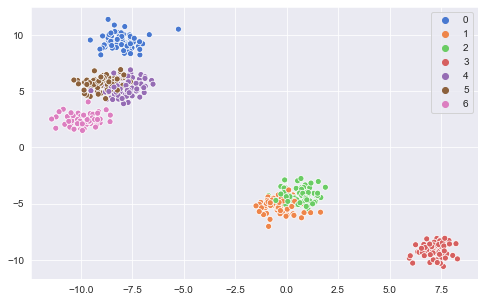

In [485]:
fig, ax = plt.subplots(figsize=(8, 5))
X,y = make_blobs(n_samples=500, centers=CENTERS, cluster_std=0.6, random_state=RANDOM_STATE)
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='muted', markers=True)
plt.show()

## K-Means

In [486]:
n_clusters = list(range(MIN_NUM_CLUSTERS, MAX_NUM_CLUSTERS))
inertia=[]
silhouette_scores = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

In [493]:
len(n_clusters)

13

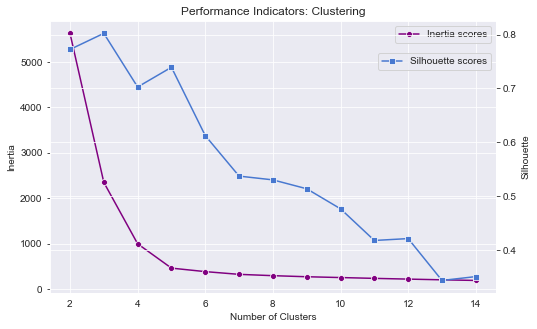

In [494]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.lineplot(x=n_clusters, y=inertia, ax=ax1, label='Inertia scores', marker='o',color='purple')
ax2 = ax1.twinx()
sns.lineplot(x=n_clusters, y=silhouette_scores, ax=ax2, label='Silhouette scores', marker='s')
ax1.set(xlabel='Number of Clusters', ylabel='Inertia')
ax2.set(ylabel='Silhouette')
plt.title('Performance Indicators: Clustering')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(1, .9))
plt.show()

In [495]:
inertia_vals = elbow(n_clusters, inertia)
inertia_rk = create_rank(inertia_vals)
print('Ideal number of clusters by inertia score: ', inertia_rk[0][0])
silhouette_vals = []
for i in range(len(n_clusters)):
    silhouette_vals.append([n_clusters[i],silhouette_scores[i]])
silhouette_rk = create_rank(silhouette_vals)
print('Ideal number of clusters by silhouette score: ',silhouette_rk[0][0])

overall = combine_ranks(inertia_rk, silhouette_rk, values=False)
print('Ideal overall number of clusters: ', overall[0][0])

Ideal number of clusters by inertia score:  5
Ideal number of clusters by silhouette score:  3
Ideal overall number of clusters:  5


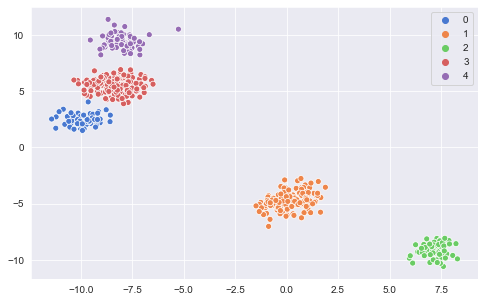

In [496]:
k = overall[0][0]
kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(X)
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_, palette='muted', markers=True)
plt.show()

## K-Medoids

In [497]:
n_clusters = list(range(MIN_NUM_CLUSTERS, MAX_NUM_CLUSTERS))
inertia=[]
silhouette_scores = []
for k in n_clusters:
    kmedoids = KMedoids(n_clusters=k, random_state=RANDOM_STATE).fit(X)
    inertia.append(kmedoids.inertia_)
    silhouette_avg = silhouette_score(X, kmedoids.labels_)
    silhouette_scores.append(silhouette_avg)

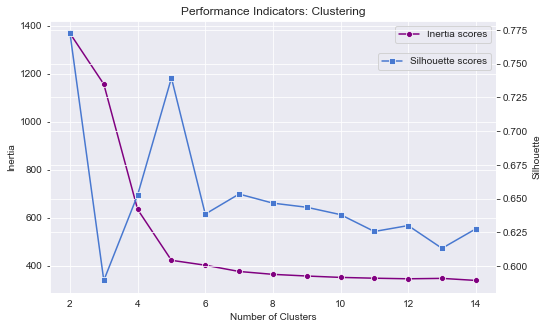

In [498]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.lineplot(x=n_clusters, y=inertia, ax=ax1, label='Inertia scores', marker='o',color='purple')
ax2 = ax1.twinx()
sns.lineplot(x=n_clusters, y=silhouette_scores, ax=ax2, label='Silhouette scores', marker='s')
ax1.set(xlabel='Number of Clusters', ylabel='Inertia')
ax2.set(ylabel='Silhouette')
plt.title('Performance Indicators: Clustering')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(1, .9))
plt.show()

In [499]:
inertia_vals = elbow(n_clusters, inertia)
inertia_rk = create_rank(inertia_vals)
print('Ideal number of clusters by inertia score: ', inertia_rk[0][0])
silhouette_vals = []
for i in range(len(n_clusters)):
    silhouette_vals.append([n_clusters[i],silhouette_scores[i]])
silhouette_rk = create_rank(silhouette_vals)
print('Ideal number of clusters by silhouette score: ',silhouette_rk[0][0])

overall = combine_ranks(inertia_rk, silhouette_rk, values=False)
print('Ideal overall number of clusters: ', overall[0][0])

Ideal number of clusters by inertia score:  5
Ideal number of clusters by silhouette score:  2
Ideal overall number of clusters:  5


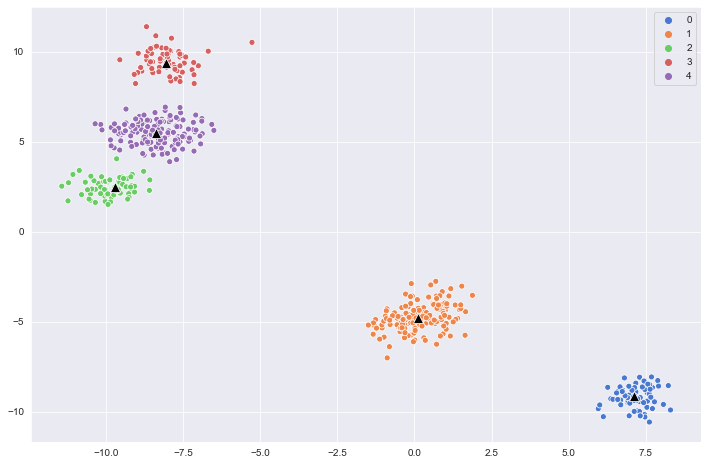

In [500]:
k = overall[0][0]
kmedoids = KMedoids(n_clusters=k, random_state=RANDOM_STATE).fit(X)
medoids = kmedoids.cluster_centers_
yhat = kmedoids.predict(X)
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmedoids.labels_, palette='muted', markers=True)
sns.scatterplot(x=medoids[:,0], y=medoids[:,1], s=100, color='black', palette='muted', marker='^')
plt.show()